In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *

In [2]:
from fastai.tabular.all import *
import pandas as pd

# Paths to datasets
netflix_movie_titles_df = pd.read_csv("C:/Users/joash/Desktop/258_Assigment3/netflix_titles.csv")

In [3]:
netflix_movie_titles_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."


In [4]:
# Convert 'type' to category
netflix_movie_titles_df['type'] =netflix_movie_titles_df['type'].astype('category')

# Define categorical and continuous columns
cat_names = ['director', 'country', 'release_year', 'duration', 'listed_in']  
cont_names = []  # Add continuous features if available
dep_var = 'type'

# Processors
procs = [Categorify, FillMissing, Normalize]

# Split data
splits = RandomSplitter(valid_pct=0.2)(range_of(netflix_movie_titles_df))

# Tabular object
to = TabularPandas(netflix_movie_titles_df, procs=procs, cat_names=cat_names, cont_names=cont_names, y_names=dep_var, splits=splits)
dls = to.dataloaders(bs=64)

In [5]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.0010000000474974513)

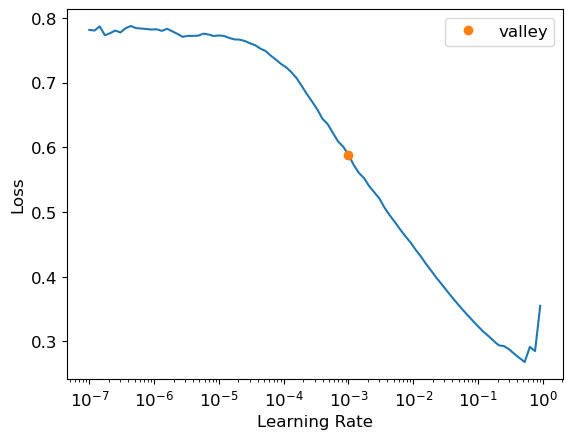

In [6]:
learn.lr_find()

In [7]:
learn.fit_one_cycle(5, 0.0010000000474974513)

epoch,train_loss,valid_loss,accuracy,time
0,0.111119,0.019152,0.997729,00:01
1,0.015983,0.002803,0.999432,00:01
2,0.002922,0.001882,0.999432,00:01
3,0.000976,0.001561,0.999432,00:01
4,0.000691,0.001531,0.999432,00:01


In [8]:
learn.show_results()


,director,country,release_year,duration,listed_in,type,type_pred
0,0,604,71,1,473,1,1
1,0,163,73,111,394,1,1
2,2385,604,65,219,275,0,0
3,3660,604,70,6,275,0,0
4,2311,147,67,213,320,0,0
5,0,489,69,1,395,1,1
6,2004,604,70,20,275,0,0
7,0,0,69,181,471,0,0
8,1868,604,71,34,37,0,0
